# Ejercicio 8

In [230]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
import time

def get_probs(g, nsim, *args):
    rnd.seed(1000)
    acc = []

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc.append(r)

    end = time.perf_counter()

    perf = end - start
    return acc, perf

In [232]:
def f_mass(x):
    if 0 <= x < 1:
        return x
    elif 1 <= x < 2:
        return 2 - x
    else:
        return 0
    
def f_prob(a):
    if a < 0:
        return 0
    elif 0 <= a < 1:
        return a**2 / 2
    elif 1 <= a < 2:
        return 1 -(1/2) * (a-2)**2
    else:
        return 1
    
def f_prob_inv(u):
    if u < 0.5:
        return (2*u)**(1/2)
    else:
        return 2 - (2-2*u)**(1/2)

## Inciso b

In [233]:
def var_suma():
    return rnd.random() + rnd.random()

def var_tinv():
    u = rnd.random()
    return f_prob_inv(u)

def var_ayr():
    while True:
        u = rnd.random()
        v = rnd.random() * 2
        if u < f_mass(v):
            return v


In [236]:
def plot_vars(f, vars, nsim):
    # fig, axs = plt.subplots(len(vars)+1)
    # fig.tight_layout()

    xs = np.arange(-0.5,2.5,0.1)
    ys = [ f(x) for x in xs ]
    plt.plot(xs,ys, label='Fun')

    for a, v, args in vars:
        acc, perf = get_probs(var_tinv, nsim, *args)

        print(50*'-')
        print(a)
        print(f'Perf: {perf:.5}')

        ys = []
        for i in xs:
            f_le = [ 1 if x <= i else 0 for x in acc ]
            v = sum(f_le) / nsim
            ys.append(v)

        plt.plot(xs,ys, label=a)
    plt.grid(linestyle = '--')
    plt.legend()

    

--------------------------------------------------
Suma
Perf: 0.0046104
--------------------------------------------------
Invertida
Perf: 0.0030842
--------------------------------------------------
AyR
Perf: 0.0038806


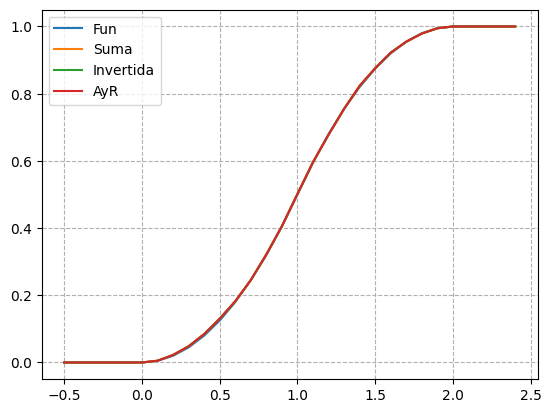

In [237]:
vars = [
    ('Suma', var_suma, []),
    ('Invertida', var_tinv, []),
    ('AyR', var_ayr, [])
]

plot_vars(f_prob, vars, 10_000)

plt.show()

In [238]:
f_prob_inv(0.125) # x0

0.5